In [1]:
import random
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

from scipy.stats import norm, skewnorm

In [63]:
import os

test_z_scores_dict = dict()
test_z_scores = []

relative_perfs = dict()
relative = []
folder = ".\\experiments\\vanilla_comp\\"
for fname in os.listdir(folder):
    if fname.endswith("relative_perfs.npy"):
        month = fname[12:15]
        relative_perfs[month] = np.load(os.path.join(folder, fname))
        relative.extend(relative_perfs[month])
    if fname.endswith("test_z_scores.npy"):
        month = fname[12:15]
        test_z_scores_dict[month] = np.load(os.path.join(folder, fname))
        test_z_scores.extend((test_z_scores_dict[month][:, :, 0][0]).tolist())

In [64]:
relative_perfs

{'Jan': array([13.5925056 ,  7.23675215, -6.21511626,  7.7469792 ,  3.9067981 ,
        21.47277626, 11.7705401 ,  9.24754697,  6.77541961]),
 'Jul': array([26.27785252, 23.73181728, 19.81163038,  9.92122287, 30.55294901,
        29.72454862, 19.39523428, 14.56692878, 12.04106089]),
 'Mar': array([23.85570452, 25.30885781, 26.01921622, 28.77920734, 23.574001  ,
        27.39071918, 27.84290917, 16.64831892, 14.8035072 ]),
 'May': array([  5.42457481,   1.64264284,  -6.78646974,  21.73462097,
         -3.48281901,   8.42148845,   2.12736108,  -0.11095511,
        -12.0813219 ]),
 'Nov': array([24.50080615, 15.49480918, 15.70022515, 15.33066109, 18.274852  ,
        24.73044585, 17.59208268, 21.53431022, 21.73569264])}

In [65]:
# 95\% confidence interval (not accurate, these samples are not independent). We assume that the 6 months we tested on (every other month) are representative
# of our overall performance on the 6 rounds of GEFCom2017. (maybe explain more why this is as fair of a comparison as it gets)
me = np.mean(relative), 
er = np.std(relative) / np.sqrt(len(relative))  # ?
print(me, 2 * er)
me - 2 * er, me + 2 * er

(14.834731001233829,) 3.1626368588111013


(array([11.67209414]), array([17.99736786]))

In [66]:
test_z_scores_dict

{'Jan': array([[[ 0.13153048],
         [ 0.20518602],
         [ 0.10987775],
         ...,
         [-0.54250027],
         [-0.62542954],
         [-0.46267832]],
 
        [[-0.12843527],
         [-0.17558908],
         [-0.25909183],
         ...,
         [-0.56507645],
         [-0.3258873 ],
         [-0.15210493]],
 
        [[-0.52099022],
         [-0.43319721],
         [-0.32724667],
         ...,
         [-1.07143315],
         [-1.10201904],
         [-0.8685809 ]],
 
        ...,
 
        [[-0.22868203],
         [-0.10298115],
         [-0.10905473],
         ...,
         [-0.4305842 ],
         [-0.45475051],
         [-0.51069521]],
 
        [[ 0.02078794],
         [ 0.10920785],
         [ 0.0612116 ],
         ...,
         [-0.4465121 ],
         [-0.57345083],
         [-0.3077559 ]],
 
        [[-0.38704745],
         [-0.23147279],
         [-0.14096756],
         ...,
         [-1.06681982],
         [-1.22007441],
         [-1.13807811]]]),
 'Jul': arra

In [67]:
test_z_scores

[0.1315304782477146,
 0.2051860154583566,
 0.10987775000339518,
 -0.00958696716378827,
 -0.1452503269596527,
 -0.34094662891933863,
 -0.6285832275071297,
 -1.1113763043329876,
 -1.4259743221063022,
 -1.4709248147004328,
 -1.414417287970474,
 -1.5822375053017195,
 -1.627849349255737,
 -1.600862504016751,
 -1.580031770802144,
 -1.586774408328987,
 -1.0505519812652773,
 -0.6449987417607964,
 -1.0573091337429608,
 -1.284076525787324,
 -1.0369398961266143,
 -0.5785582522915189,
 -0.33191934466943523,
 -0.2262666974481943,
 -0.016399662909640546,
 0.13169658651499455,
 0.0855175232885626,
 -0.07938382193165439,
 -0.32706727357197274,
 -0.6047607380298017,
 -0.9690666206298696,
 -1.5128782319781686,
 -1.7273357968668661,
 -1.486853886068503,
 -1.20916482907476,
 -1.1632219994686792,
 -1.0754526987606188,
 -0.9768943418037317,
 -1.0423834605803926,
 -1.1053700859039024,
 -0.6751673172552592,
 -0.43502754690889844,
 -0.9710263430793049,
 -1.3317133598747875,
 -1.3281075789643542,
 -1.1790362252

(-0.2477465211414568, 1.1300237651817098)

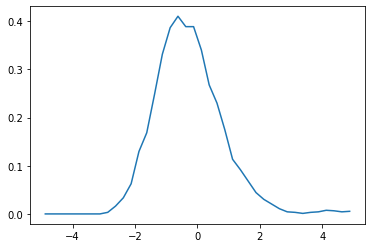

In [68]:
z_hist, bin_edges = np.histogram(test_z_scores, bins=40, range=(-5, 5), density=True)
z_axis = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.plot(z_axis, z_hist, label="Koopman test z-scores")
# plt.plot(z_axis, normal_pdf(0, 1, z_axis), label="Standard Normal Curve")
# plt.title(list(all_data.keys())[i])
np.mean(test_z_scores), np.mean(np.std(test_z_scores))